# Comparison of Batch, Mini-Batch and Stochastic Gradient Descent

This notebook displays an animation comparing Batch, Mini-Batch and Stochastic Gradient Descent (introduced in Chapter 4). Thanks to [Daniel Ingram](https://github.com/daniel-s-ingram) who contributed this notebook.

In [1]:
from __future__ import print_function, division, unicode_literals
import numpy as np

%matplotlib nbagg
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

<IPython.core.display.Javascript object>


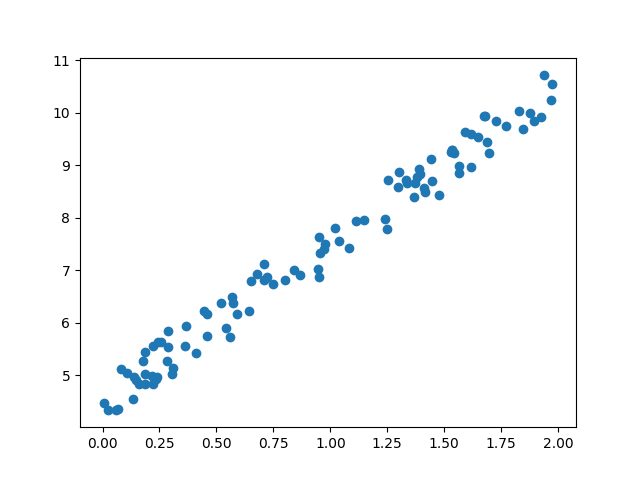

In [9]:
m = 100
X = 2*np.random.rand(m, 1)
X_b = np.c_[np.ones((m, 1)), X]
y = 4 + 3*X + np.random.rand(m, 1)

plt.scatter(X, y)

In [10]:
def batch_gradient_descent():
    n_iterations = 1000
    learning_rate = 0.05
    thetas = np.random.randn(2, 1)
    thetas_path = [thetas]
    for i in range(n_iterations):
        gradients = 2*X_b.T.dot(X_b.dot(thetas) - y)/m
        thetas = thetas - learning_rate*gradients
        thetas_path.append(thetas)

    return thetas_path

In [11]:
def stochastic_gradient_descent():
    n_epochs = 50
    t0, t1 = 5, 50
    thetas = np.random.randn(2, 1)
    thetas_path = [thetas]
    for epoch in range(n_epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X_b[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = 2*xi.T.dot(xi.dot(thetas) - yi)
            eta = learning_schedule(epoch*m + i, t0, t1)
            thetas = thetas - eta*gradients
            thetas_path.append(thetas)

    return thetas_path

In [12]:
def mini_batch_gradient_descent():
    n_iterations = 50
    minibatch_size = 20
    t0, t1 = 200, 1000
    thetas = np.random.randn(2, 1)
    thetas_path = [thetas]
    t = 0
    for epoch in range(n_iterations):
        shuffled_indices = np.random.permutation(m)
        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        for i in range(0, m, minibatch_size):
            t += 1
            xi = X_b_shuffled[i:i+minibatch_size]
            yi = y_shuffled[i:i+minibatch_size]
            gradients = 2*xi.T.dot(xi.dot(thetas) - yi)/minibatch_size
            eta = learning_schedule(t, t0, t1)
            thetas = thetas - eta*gradients
            thetas_path.append(thetas)

    return thetas_path

In [13]:
def compute_mse(theta):
    return np.sum((np.dot(X_b, theta) - y)**2)/m

In [14]:
def learning_schedule(t, t0, t1):
    return t0/(t+t1)

In [15]:
theta0, theta1 = np.meshgrid(np.arange(0, 5, 0.1), np.arange(0, 5, 0.1))
r, c = theta0.shape
cost_map = np.array([[0 for _ in range(c)] for _ in range(r)])
for i in range(r):
    for j in range(c):
        theta = np.array([theta0[i,j], theta1[i,j]])
        cost_map[i,j] = compute_mse(theta)

In [16]:
exact_solution = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
bgd_thetas = np.array(batch_gradient_descent())
sgd_thetas = np.array(stochastic_gradient_descent())
mbgd_thetas = np.array(mini_batch_gradient_descent())

[[4.51951607]
 [2.99481476]]


<IPython.core.display.Javascript object>


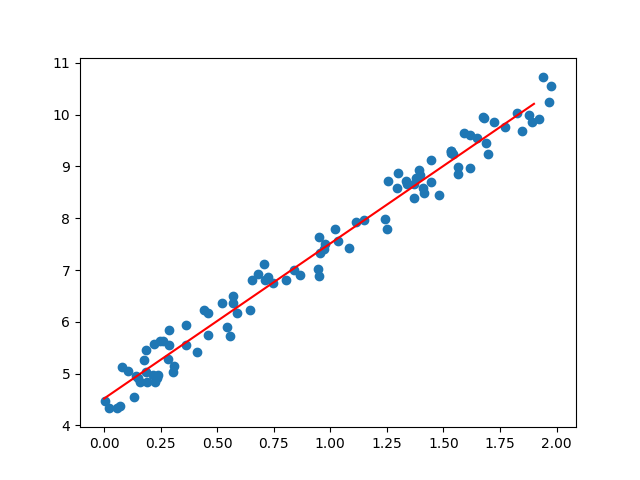

In [29]:
print(exact_solution)
data_x = np.arange(0,2,0.1)
data_y = data_x*exact_solution[1] + exact_solution[0]
plt.plot(data_x,data_y, color="r")
plt.scatter(X,y)

In [17]:
bgd_len = len(bgd_thetas)
sgd_len = len(sgd_thetas)
mbgd_len = len(mbgd_thetas)
n_iter = min(bgd_len, sgd_len, mbgd_len)

<IPython.core.display.Javascript object>


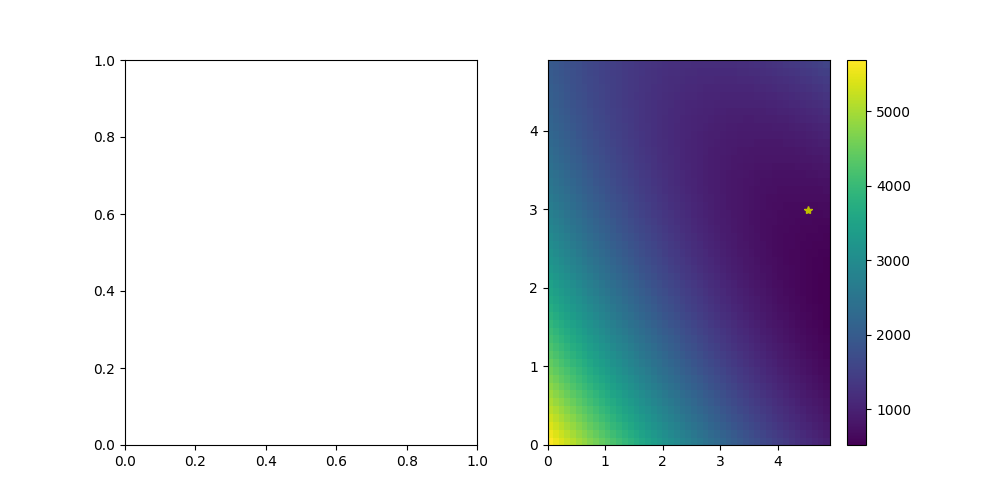

In [18]:
fig = plt.figure(figsize=(10, 5))
data_ax = fig.add_subplot(121)
cost_ax = fig.add_subplot(122)

cost_ax.plot(exact_solution[0,0], exact_solution[1,0], 'y*')
cost_img = cost_ax.pcolor(theta0, theta1, cost_map)
fig.colorbar(cost_img)

In [30]:
def animate(i):
    data_ax.cla()
    cost_ax.cla()

    data_ax.plot(X, y, 'k.')

    cost_ax.plot(exact_solution[0,0], exact_solution[1,0], 'y*')
    cost_ax.pcolor(theta0, theta1, cost_map)

    data_ax.plot(X, X_b.dot(bgd_thetas[i,:]), 'r-')
    cost_ax.plot(bgd_thetas[:i,0], bgd_thetas[:i,1], 'r--')

    data_ax.plot(X, X_b.dot(sgd_thetas[i,:]), 'g-')
    cost_ax.plot(sgd_thetas[:i,0], sgd_thetas[:i,1], 'g--')

    data_ax.plot(X, X_b.dot(mbgd_thetas[i,:]), 'b-')
    cost_ax.plot(mbgd_thetas[:i,0], mbgd_thetas[:i,1], 'b--')

    data_ax.set_xlim([0, 2])
    data_ax.set_ylim([0, 15])
    cost_ax.set_xlim([0, 5])
    cost_ax.set_ylim([0, 5])

    data_ax.set_xlabel(r'$x_1$')
    data_ax.set_ylabel(r'$y$', rotation=0)
    cost_ax.set_xlabel(r'$\theta_0$')
    cost_ax.set_ylabel(r'$\theta_1$')

    data_ax.legend(('Data', 'BGD', 'SGD', 'MBGD'), loc="upper left")
    cost_ax.legend(('Normal Equation', 'BGD', 'SGD', 'MBGD'), loc="upper left")

In [31]:
animation = FuncAnimation(fig, animate, frames=n_iter)
plt.show()